# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 400109638
full_name = "Mana Abbaszadeh"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
#TODO

data = pd.read_csv('nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
#TODO
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
#TODO
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [6]:
numeric_features.set_index('ID', inplace=True)

First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

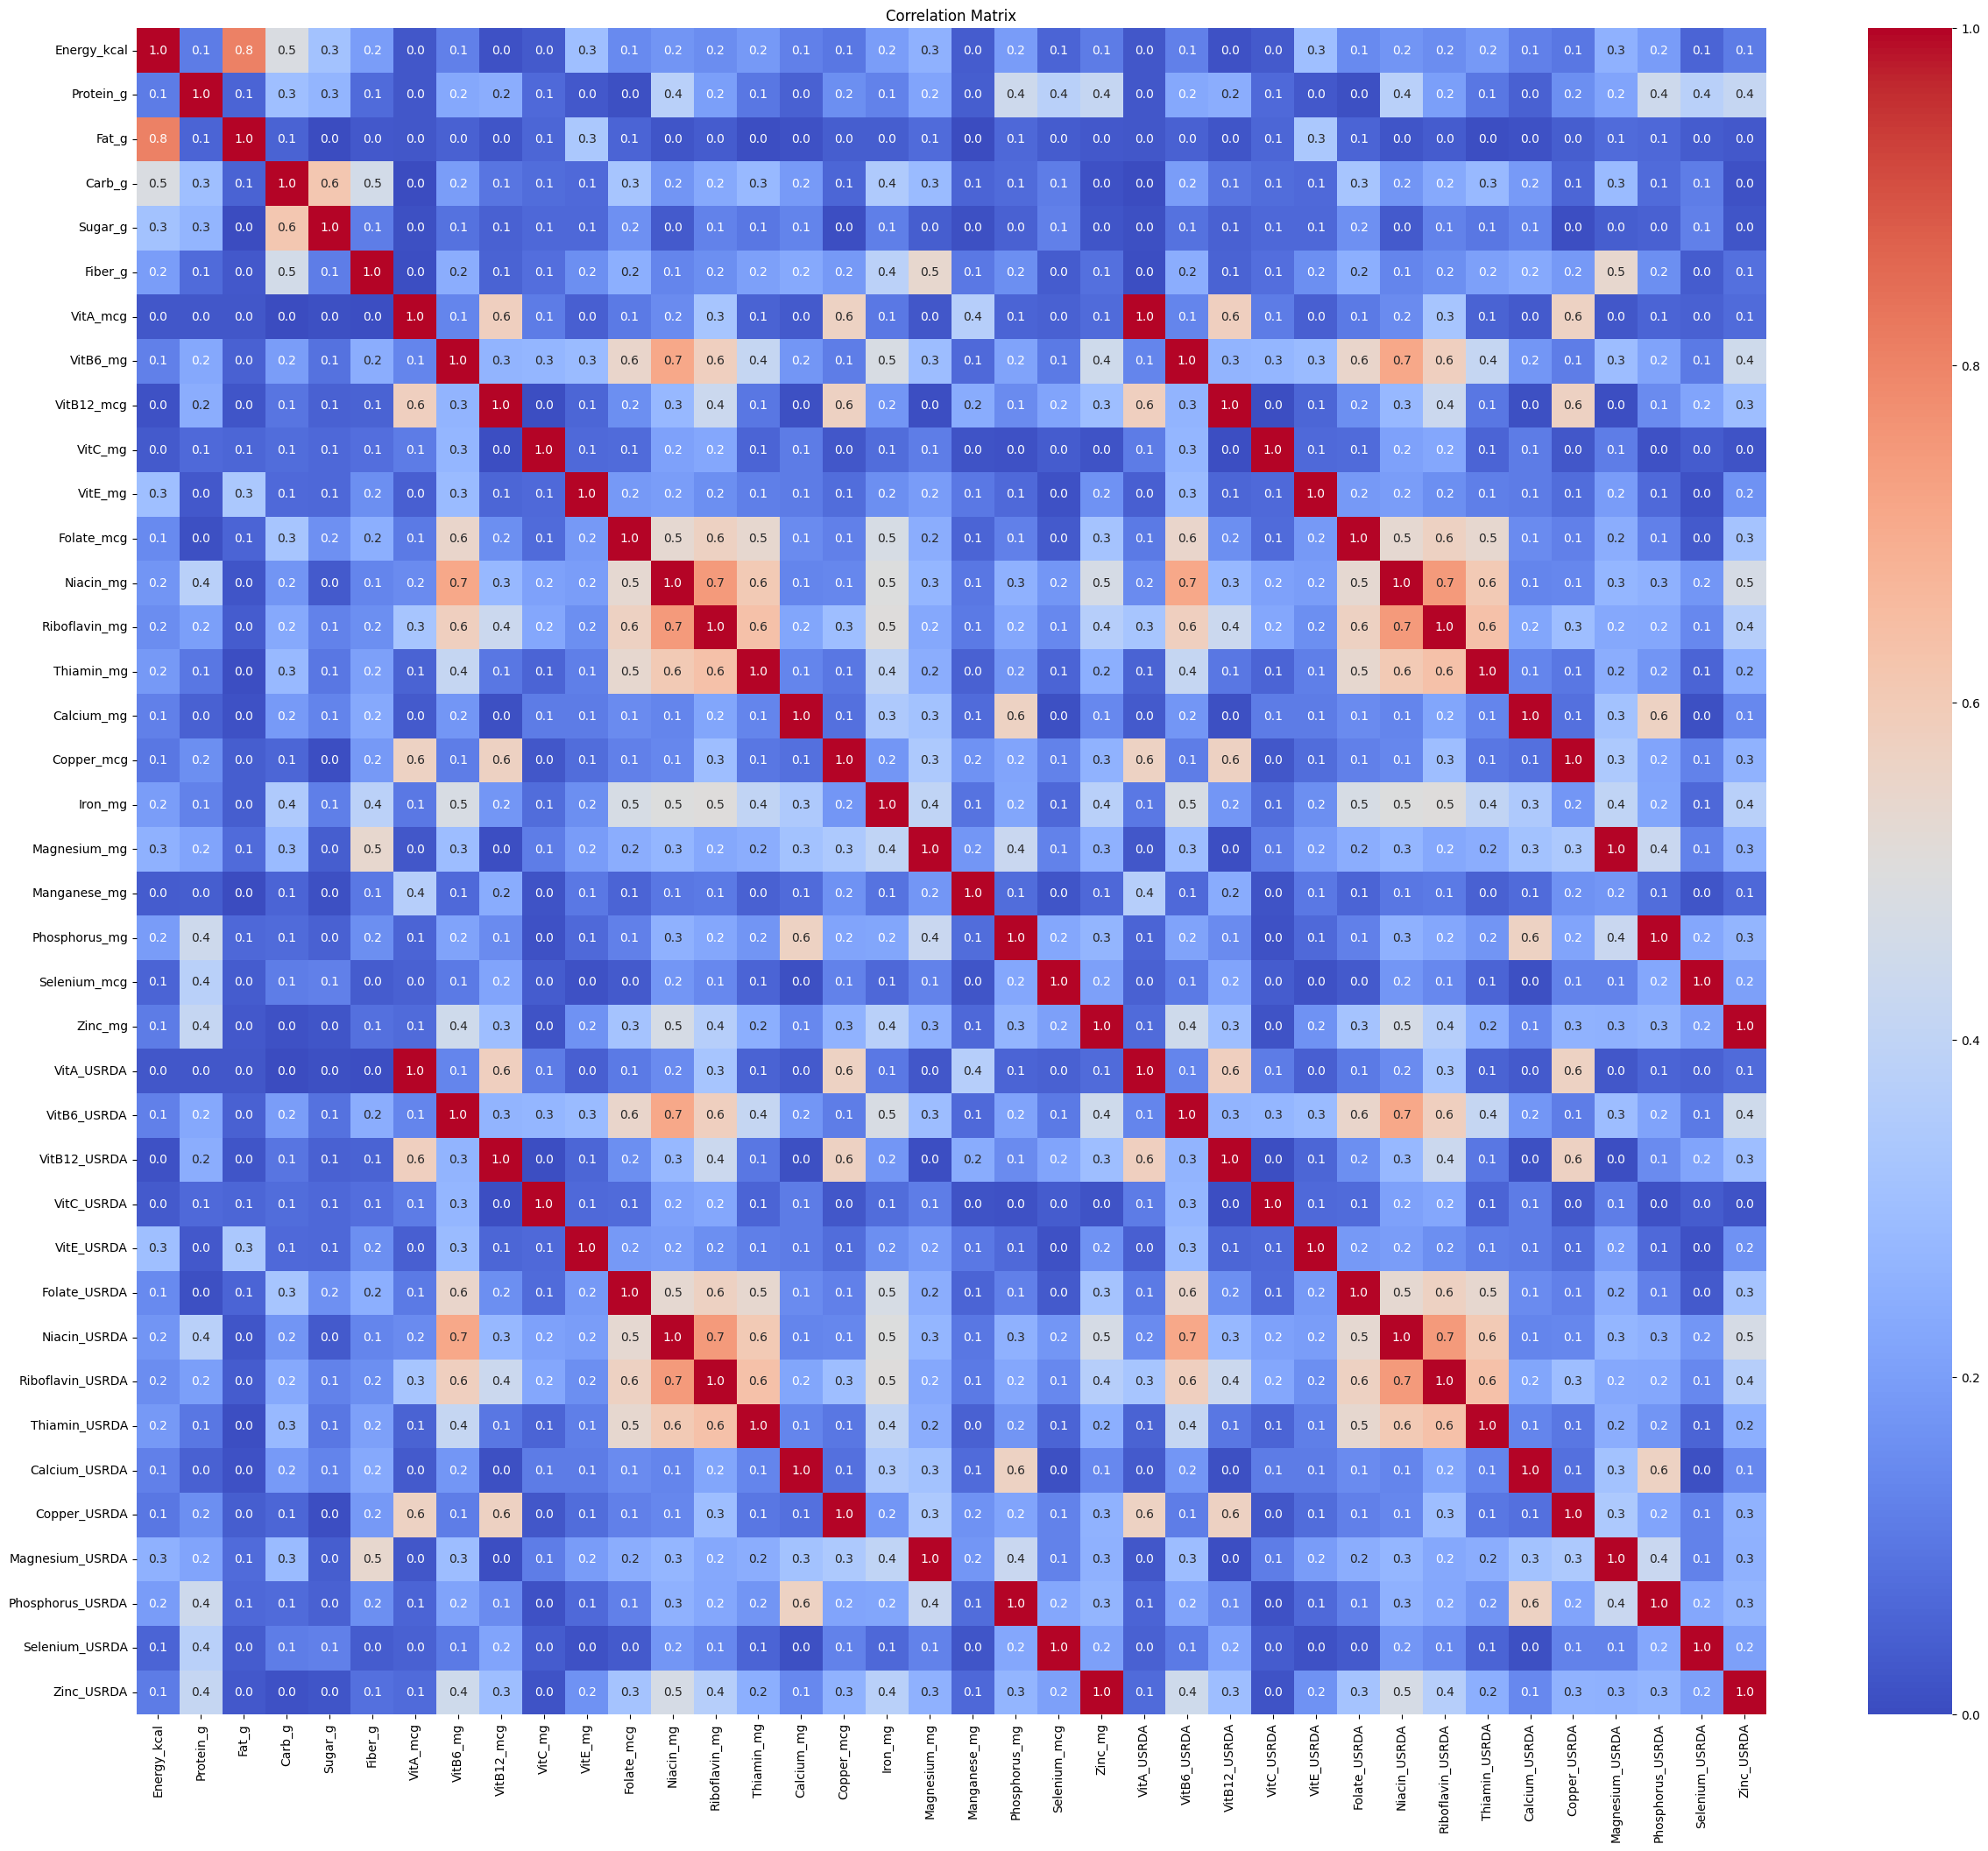

In [7]:
#TODO
plt.figure(figsize=(30, 25))
cm = numeric_features.corr().abs()
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".1f",vmin=0, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

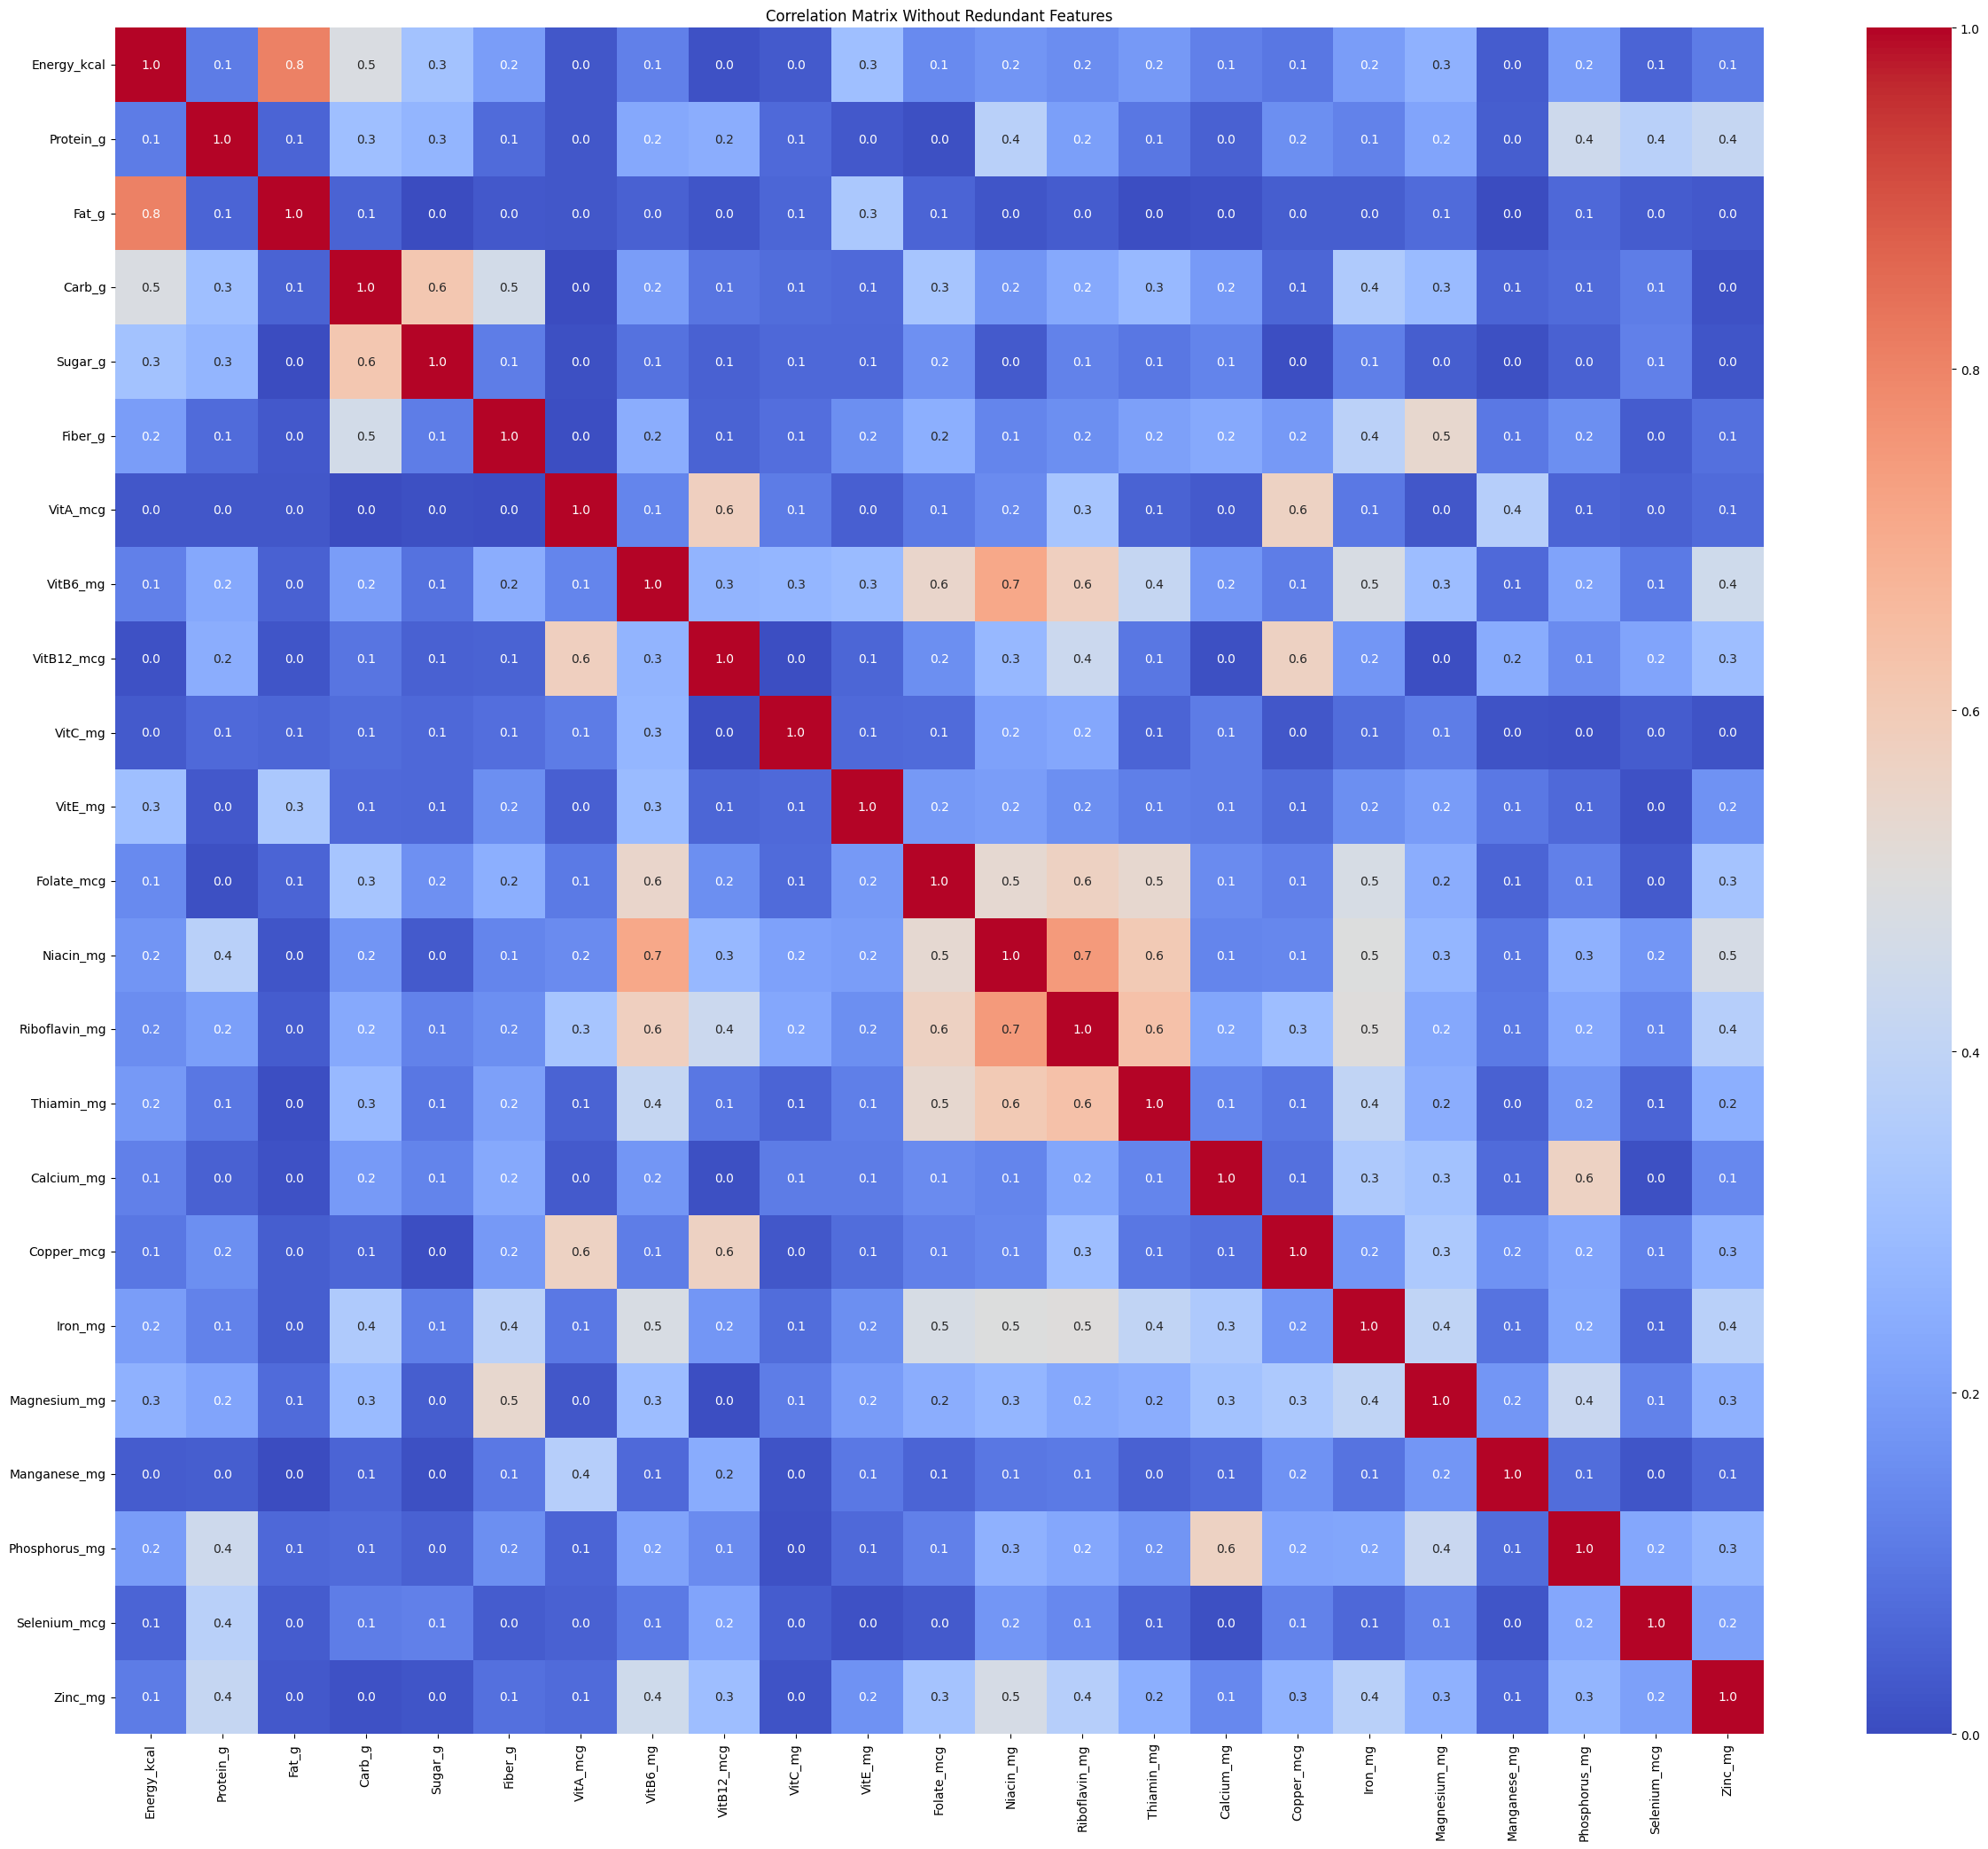

In [8]:
#TODO

redundant_cols_list = set()
size = len(cm.columns)
threshold = 0.9

for m in range(size):
    for n in range(m + 1, size):
        if abs(cm.iloc[m, n]) >= threshold:
            redundant_cols_list.add(cm.columns[n])
new_numeric_features = numeric_features.drop(columns=redundant_cols_list)

plt.figure(figsize=(30, 25))
new_cm = new_numeric_features.corr().abs()
sns.heatmap(new_cm, annot=True, fmt=".1f",cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix Without Redundant Features')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

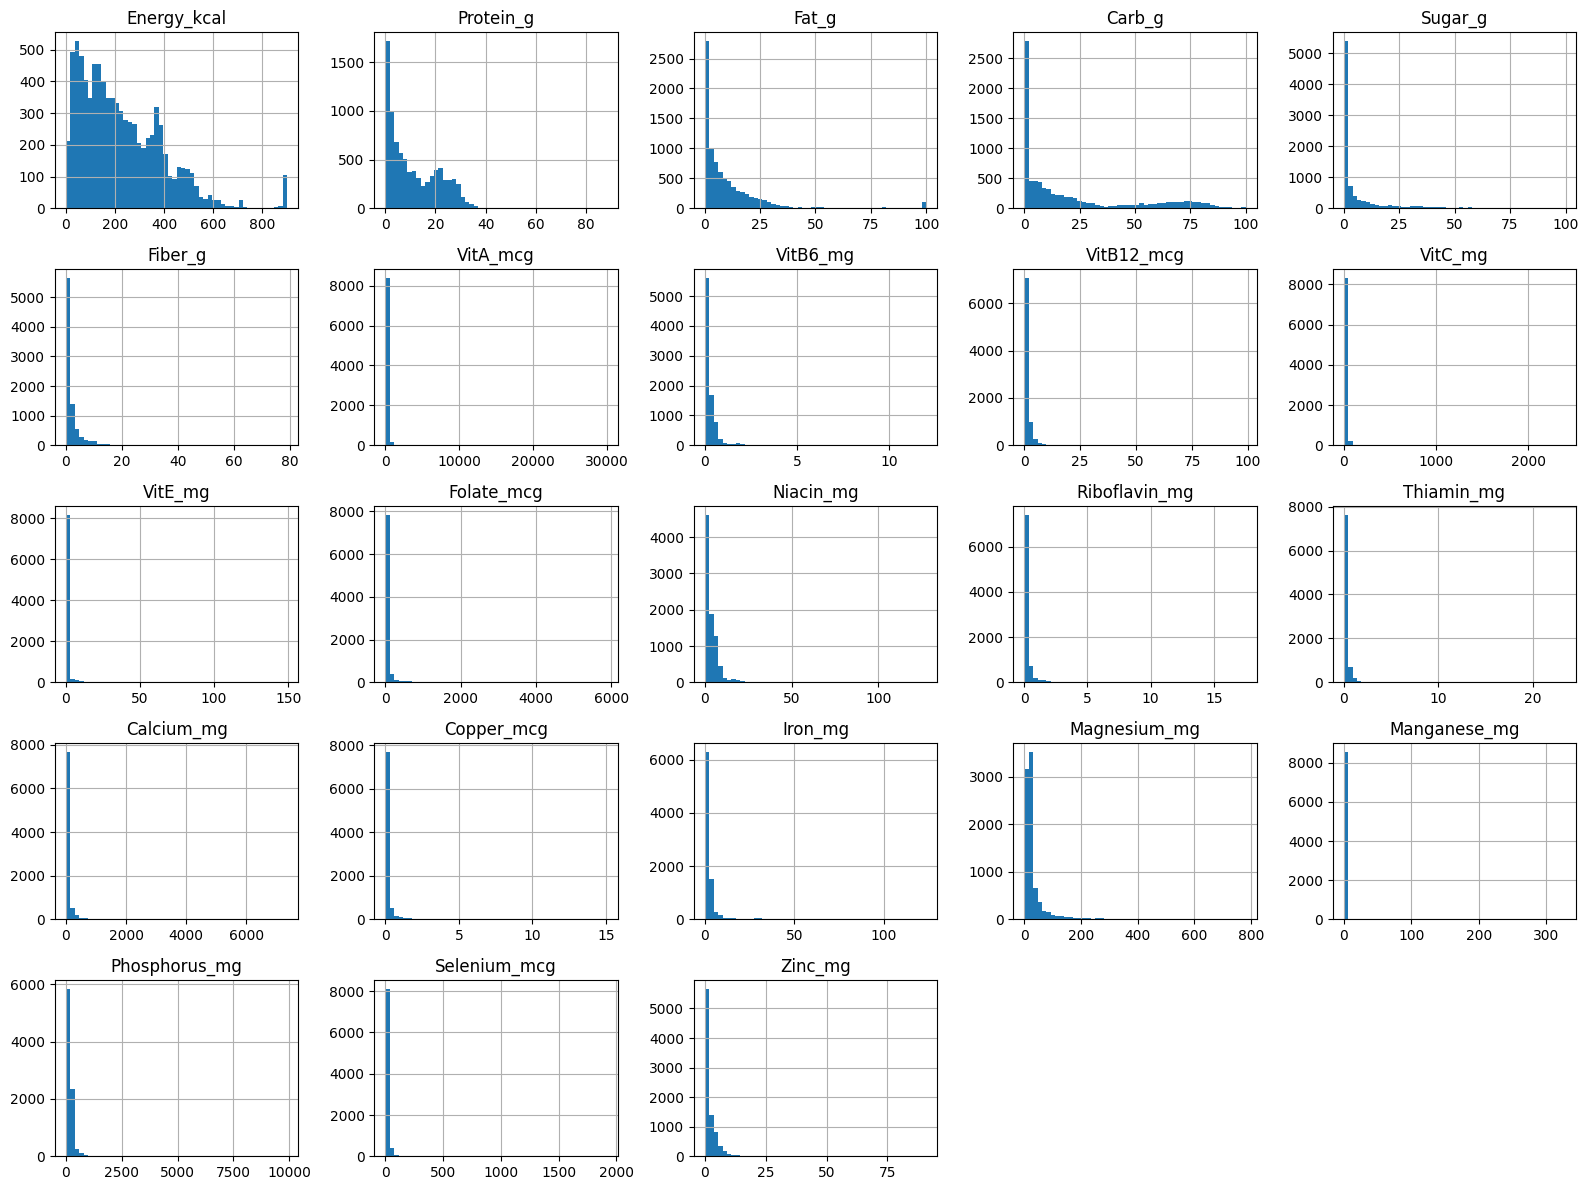

In [9]:
#TODO

plt.figure(figsize=(16, 12))
for i, col in enumerate(new_numeric_features.columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(new_numeric_features[col], bins=50)
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [10]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array

new_numeric_features_copy = new_numeric_features.copy() + 1
df_boxcoxed = pd.DataFrame(index=new_numeric_features_copy.index)

for i in new_numeric_features.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(new_numeric_features_copy.loc[:, i])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

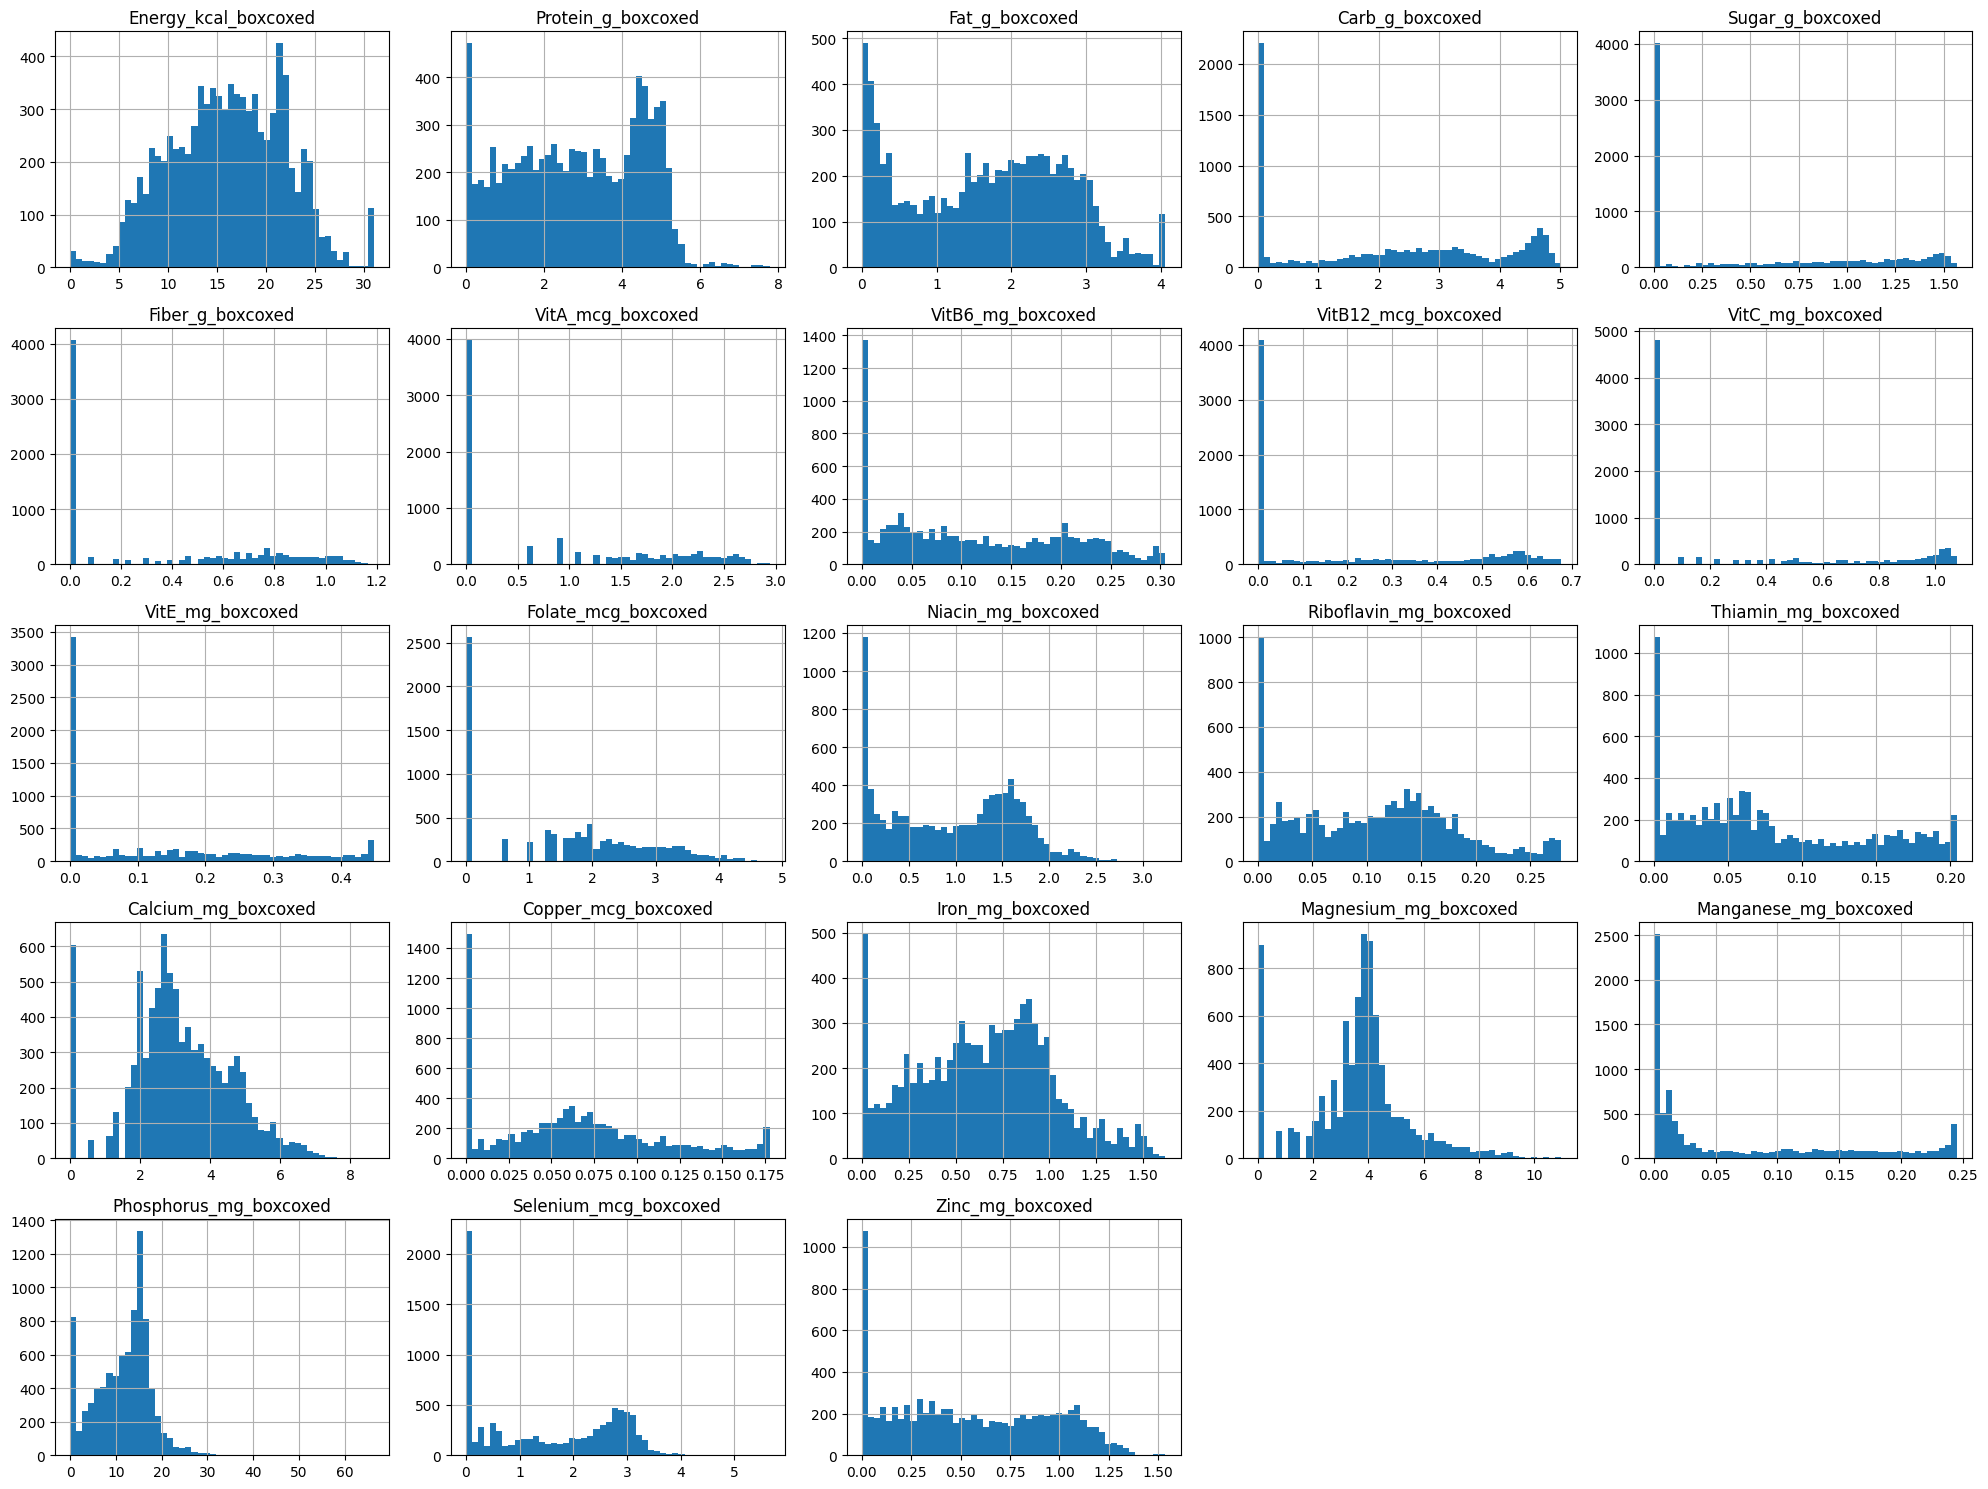

In [11]:
#TODO

plt.figure(figsize=(20, 15))
for i, col in enumerate(df_boxcoxed.columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(df_boxcoxed[col], bins=50)
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [12]:
#TODO
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_boxcoxed)

total_mean = scaled_data.mean()
total_std = scaled_data.std()

print(f'total mean: {total_mean}')
print(f'total standard dev: {total_std}')

total mean: -5.16200439673557e-18
total standard dev: 0.9999999999999999


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [13]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        self.mean = np.mean(X, axis=0)
        
        X_centered = X - self.mean
        
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        sorted_vals = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalus = eigenvalues[sorted_vals]

        sorted_eigenvecs = eigenvectors[:, sorted_vals]
        self.components = sorted_eigenvecs[:, :self.n_components]
        
        explained_variance = sorted_eigenvalus[:self.n_components][:self.n_components]
        self.explained_variance_ratio_ = explained_variance / (np.sum(sorted_eigenvalus))
        pass

    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        pca = np.dot(X_centered, self.components)
        return pca
        pass

    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
        pass

    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components
        pass


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [14]:
#TODO
pca = CustomPCA(n_components=scaled_data.shape[1])
pca.fit(scaled_data)
X_transformed = pca.transform(scaled_data)

explained_variance_ratio = pca.get_explained_variance_ratio()
components = pca.get_components()

print(f'Explained variance ratio:\n {explained_variance_ratio}')
print(f'\nEigenvectors (Principal components):\n {components}')

Explained variance ratio:
 [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]

Eigenvectors (Principal components):
 [[-1.65126285e-01 -4.18501129e-02 -5.08062046e-01 -1.58787185e-01
  -2.04336042e-01  1.80913191e-03  2.30397835e-01 -1.81383994e-01
  -9.68747368e-02 -1.06435861e-01 -1.45702301e-01 -1.41609667e-01
  -1.06699263e-01 -8.35121567e-02 -1.53289013e-01  1.20599053e-01
  -2.17138388e-01 -5.94332857e-02 -6.74566774e-02  7.75871197e-02
   1.15935558e-01 -2.28132086e-01  5.61042214e-01]
 [-2.86085952e-01  1.96126976e-01 -2.68284160e-02  9.09436328e-02
  -4.61478260e-02  1.49797322e-01 -1.14003881e-01 -2.41629464e-02
   6.86941384e-02  3.00585450e-02  5.56251050e-02 -4.82969265e-02
   1.50738592e-01  3.44909523e-01 -7.02210354e-02  1.83871434e-02
   2.37896744e-01 -1.21523092e-

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


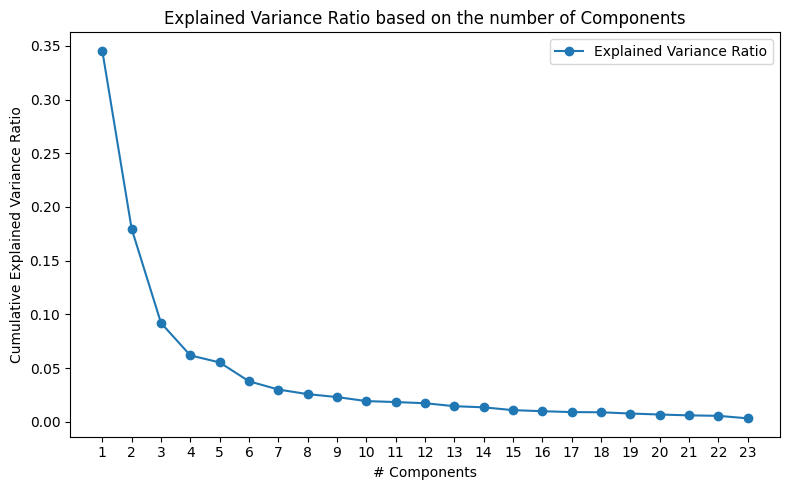

In [15]:
#TODO

size = len(explained_variance_ratio) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, size), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.title('Explained Variance Ratio based on the number of Components')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, size))
plt.tight_layout()
plt.legend()
plt.show()

therefore we are going to pick 5 components

In [16]:
#TODO
#print the total explained variance ration for the first 5 components

explained_variance_ratio = pca.get_explained_variance_ratio()
total_variance_ratio = np.sum(explained_variance_ratio[:5])
print(total_variance_ratio)

0.7342383069254745


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [17]:
#TODO

_5_componets = CustomPCA(n_components=5)
_5_componets.fit(scaled_data)
data_5c = _5_componets.transform(scaled_data)

df_with_5c = pd.DataFrame(data_5c, columns=[f'c{component_num + 1}' for component_num in range(5)], index=new_numeric_features.index)

df_copy = data.copy()
df_copy.set_index('ID', inplace=True)

for col in ["FoodGroup", "ShortDescrip", "Descrip"]:
    df_with_5c[col] = df_copy.loc[df_with_5c.index, col].values

df_with_5c.head()

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,2.638414,1.702512,-1.283725,-3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,2.537931,1.550464,-1.279816,-3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,3.751335,2.080190,-2.067932,-3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,-2.000578,1.361858,0.395834,-2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,-1.582713,1.321484,0.238444,-2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [18]:
#TODO

component_columns = [f'c{component_num + 1}' for component_num in range(5)]
pca_matrix = df_with_5c[component_columns].corr()
corr_check_pca = pd.DataFrame(pca_matrix.round(10))
corr_check_pca.head()

,c1,c2,c3,c4,c5
c1,1.0,-0.0,0.0,0.0,-0.0
c2,-0.0,1.0,-0.0,0.0,0.0
c3,0.0,-0.0,1.0,-0.0,-0.0
c4,0.0,0.0,-0.0,1.0,-0.0
c5,-0.0,0.0,-0.0,-0.0,1.0


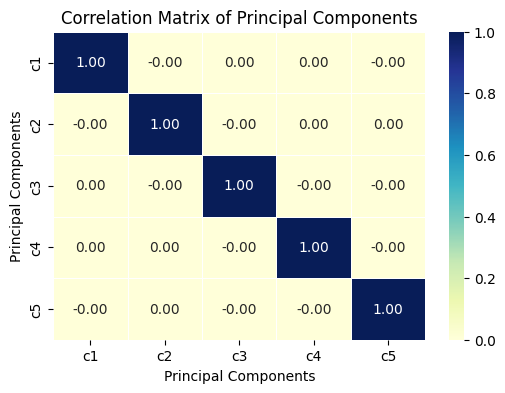

In [100]:
plt.figure(figsize=(6, 4))
sns.heatmap(pca_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Principal Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [24]:
# TODO get eigenvectors

eigenvectors = pca.get_components()
cols = new_numeric_features.columns
eigenvectors_df = pd.DataFrame(eigenvectors, columns=cols)

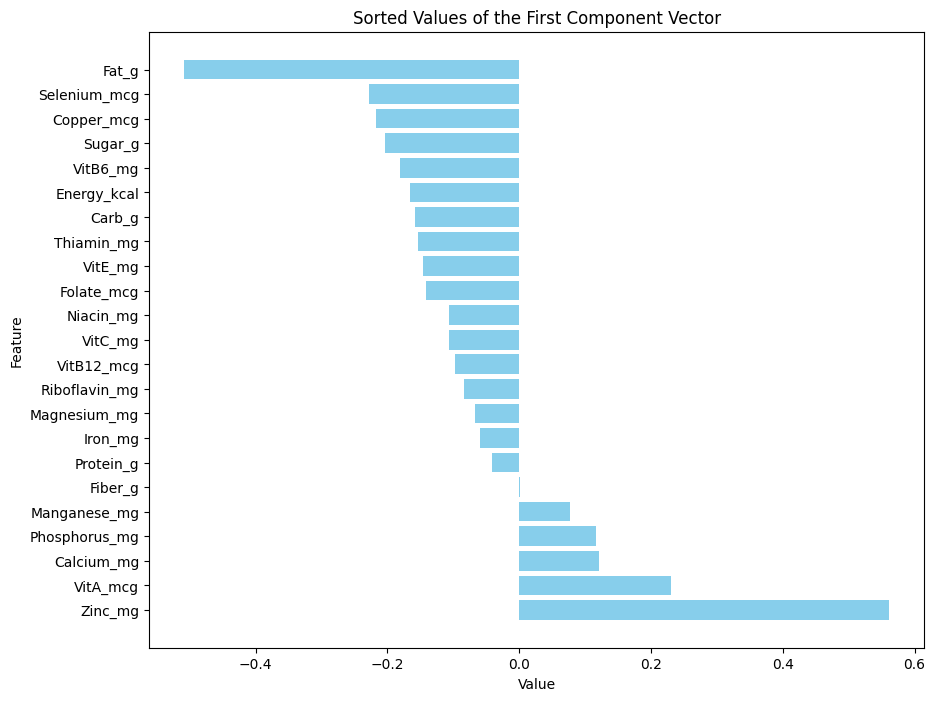

In [30]:
#TODO
sorted_comp = eigenvectors_df.iloc[0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(sorted_comp.index, sorted_comp.values, color='skyblue')
plt.title(f'Sorted Values of the First Component Vector')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

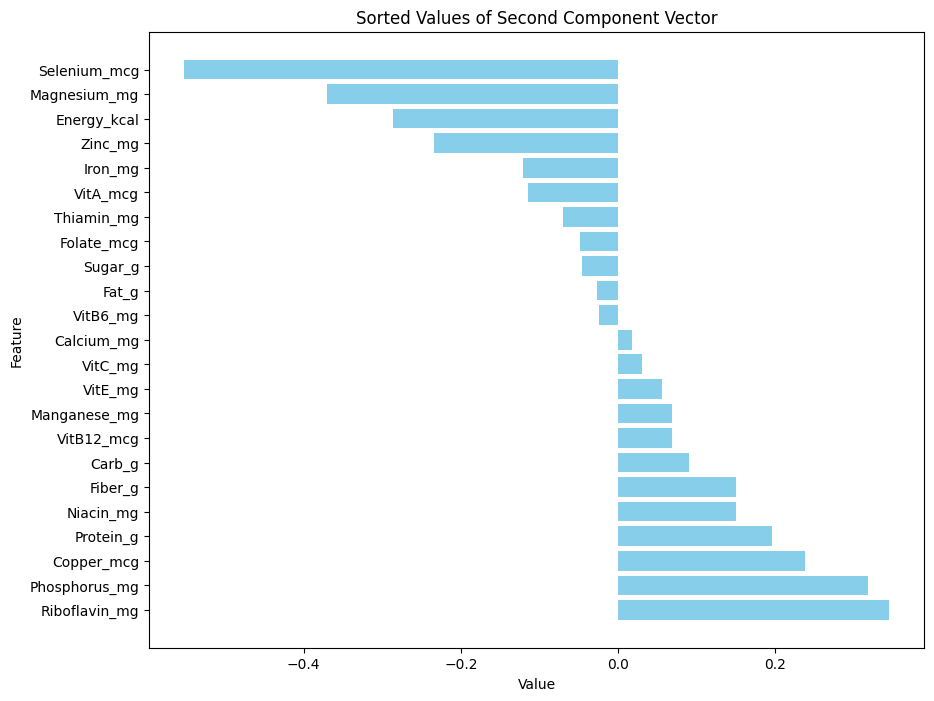

In [31]:
#TODO
sorted_second_comp = eigenvectors_df.iloc[1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(sorted_second_comp.index, sorted_second_comp.values, color='skyblue')
plt.title('Sorted Values of Second Component Vector')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER:</span>

These plots help identify which features (nutrients) are most important for each principal component. We can simplify the dataset by focusing on a few principal components with significant contributions from each nutrients (while considering essential information). Now lets check them individually:
- First Component: 
The nutrients with the highest absolute values have the most significant impact on the formation of the first principal component. The positivity and negativity of each value indicates the direction of influence. Positive values suggest a direct correlation with the component, while negative values indicate an inverse relationship with the component.
- Second Component: 
The nutrients with the highest absolute values have the most significant impact on the formation of the second principal component. The positivity and negativity of each value indicates the direction of influence. Positive values indicate direct relationships and negative values indicate inverse relationships.

Second component captures a different pattern or trend in the data compared to the first component.

### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

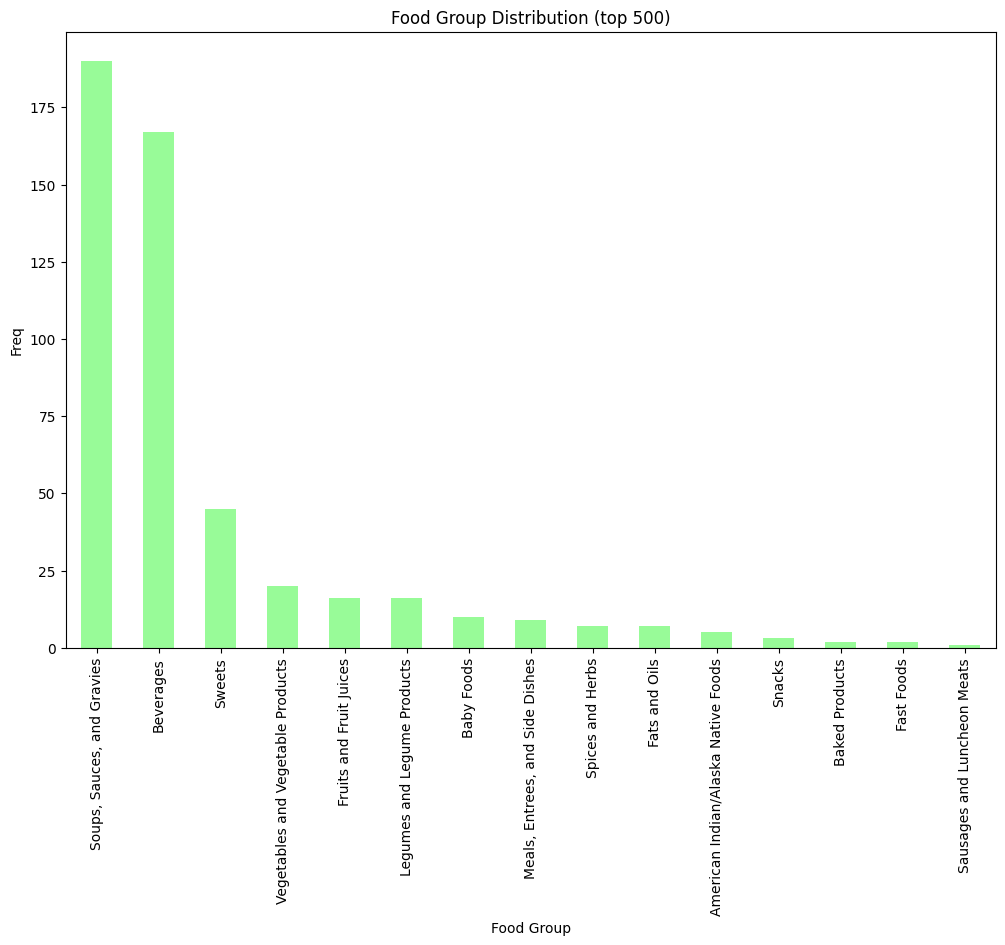

In [101]:
#TODO
df_with_5c['PCA1'] = X_transformed[:, 0]
top_500_pca1 = df_with_5c.nlargest(500, 'PCA1')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', color='palegreen')
plt.title('Food Group Distribution (top 500)')
plt.xlabel('Food Group')
plt.ylabel('Freq')
plt.show()

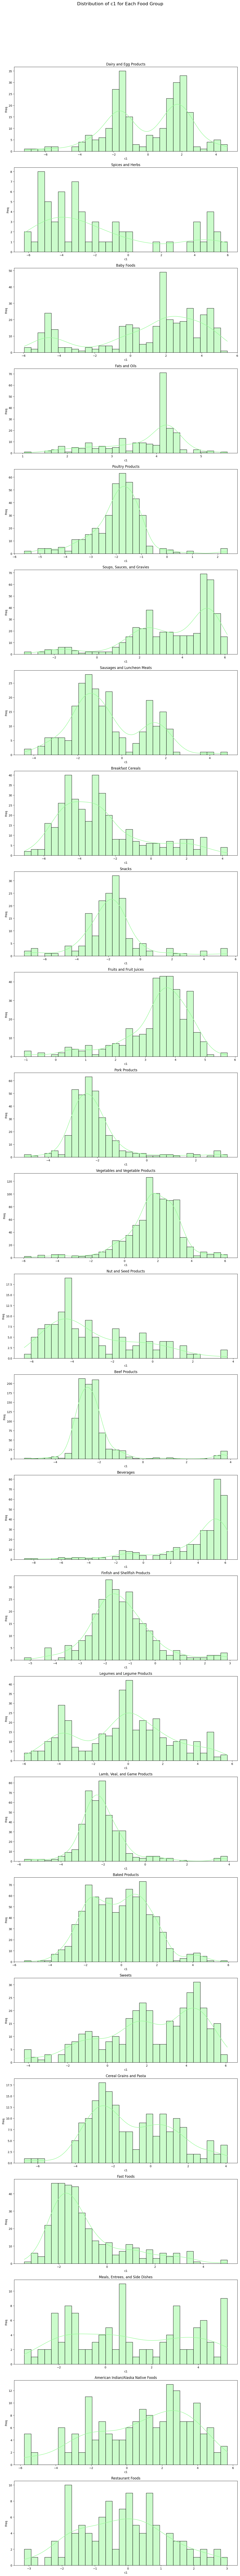

In [74]:
#TODO
unique_food_groups = df_with_5c['FoodGroup'].unique()
plt.figure(figsize=(12, 5 * len(unique_food_groups)))

for idx, food_group in enumerate(unique_food_groups):
    plt.subplot(len(unique_food_groups), 1, idx + 1)
    subset = df_with_5c[df_with_5c['FoodGroup'] == food_group]
    sns.histplot(subset['c1'], bins=30, kde=True, color='palegreen')
    plt.title(f'{food_group}')
    plt.ylabel('Freq')

plt.suptitle('Distribution of c1 for Each Food Group', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Do the same for pca2.

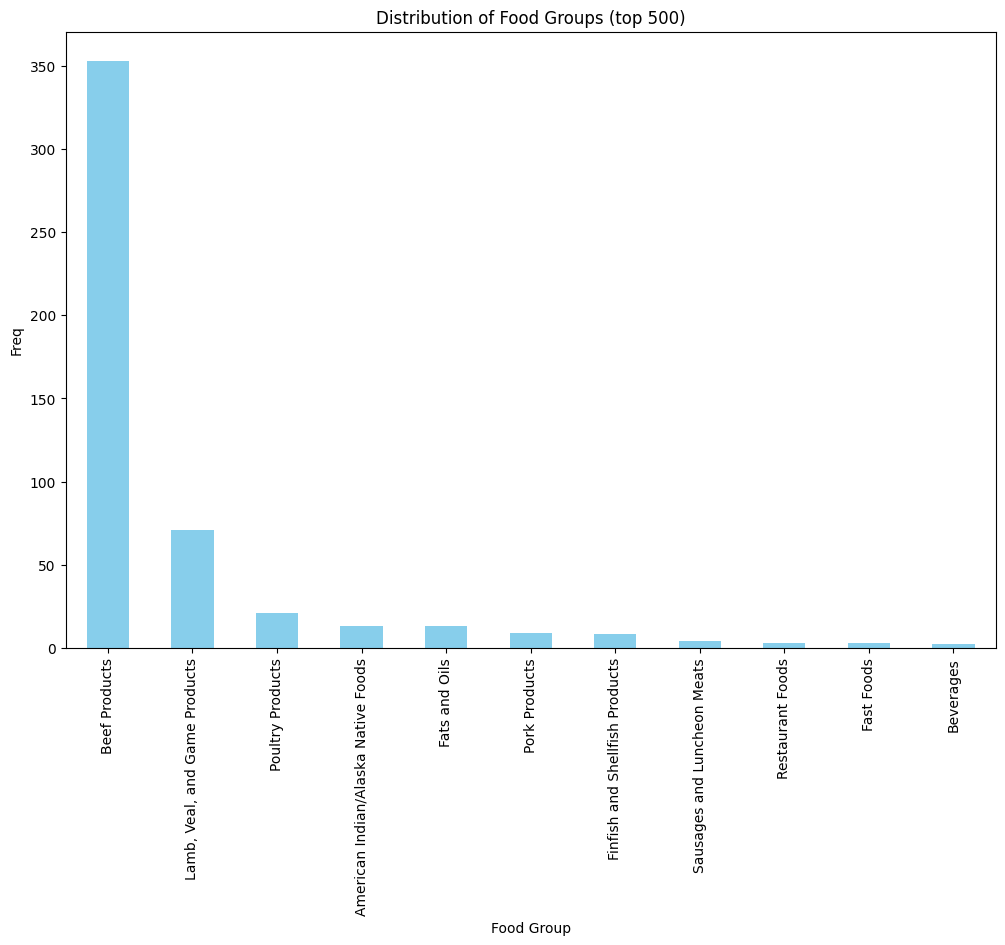

In [102]:
#TODO
top_500_pca2 = df_with_5c.nlargest(500, 'c2')

plt.figure(figsize=(12, 8))
top_500_pca2['FoodGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Food Groups (top 500)')
plt.xlabel('Food Group')
plt.ylabel('Freq')
plt.show()

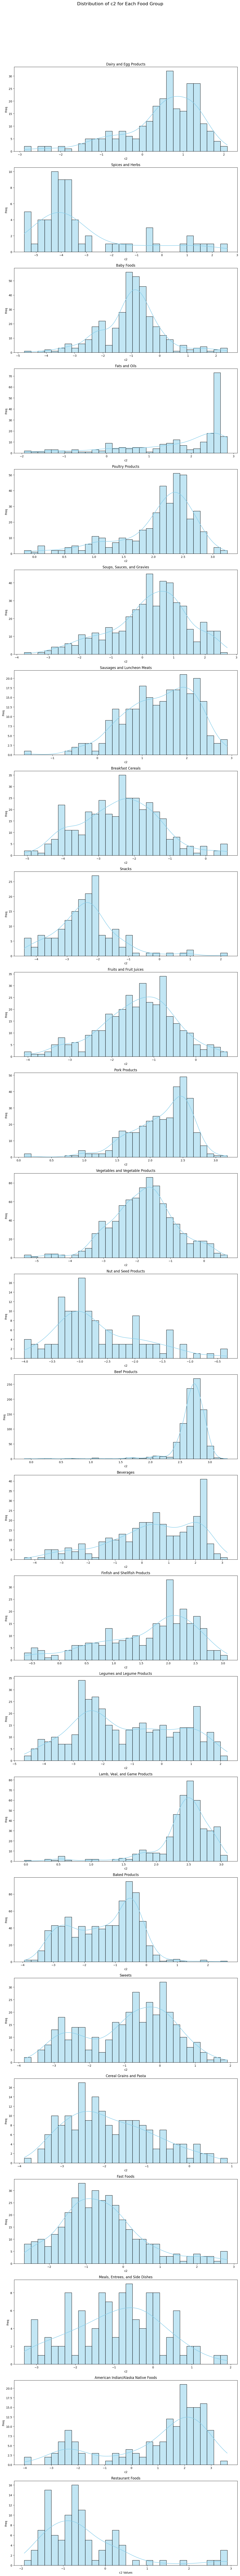

In [73]:
#TODO
unique_food_groups = df_with_5c['FoodGroup'].unique()

plt.figure(figsize=(12, 5 * len(unique_food_groups)))

for idx, food_group in enumerate(unique_food_groups):
    plt.subplot(len(unique_food_groups), 1, idx + 1)
    subset = df_with_5c[df_with_5c['FoodGroup'] == food_group]
    sns.histplot(subset['c2'], bins=30, kde=True, color='skyblue')
    plt.title(f'{food_group}')
    plt.ylabel('Freq')

plt.suptitle('Distribution of c2 for Each Food Group', y=1.02, fontsize=16)
plt.xlabel('c2 Values')
plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


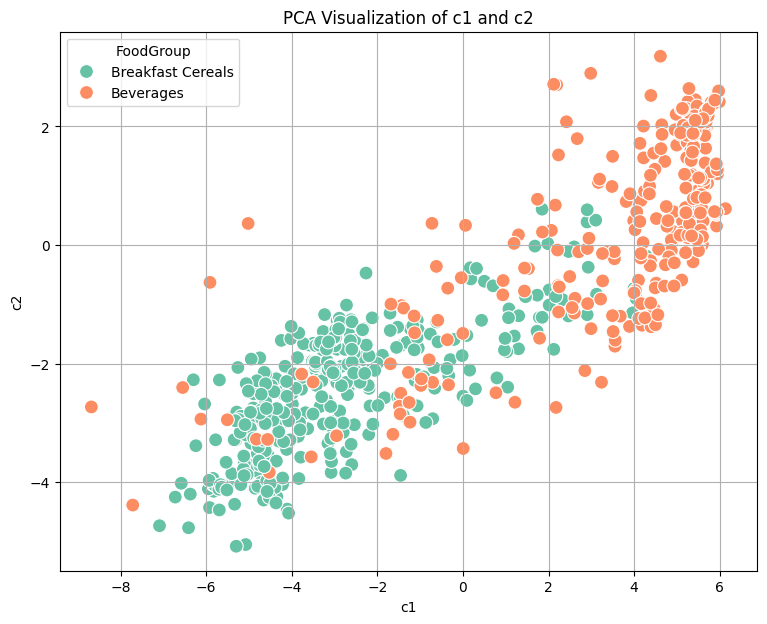

In [91]:
#TODO
subset = df_with_5c[df_with_5c['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

# Plot PCA1 and PCA2
plt.figure(figsize=(9, 7))
sns.scatterplot(x='c1', y='c2', hue='FoodGroup', data=subset, palette='Set2', s=100)
plt.title('PCA Visualization of c1 and c2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.grid(True)
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer: <br> - From PCA1 for top 500 samples we can understand which food groups have higher PCA1 values, indicating their relative nutritional composition compared to others. So we can identify which types of foods contribute more significantly to the variance captured by PCA1. <br> - With the distribution of PCA1 for each food group we can understand the range and spread of PCA1 values within different categories of food. <br> - From the distribution of PCA2 for top 500 samples we can identify which food groups are more likely to have higher or lower PCA2 values. So by this comparison we understand the nutritional characteristics that differentiate these samples. It complements the analysis provided by PCA1 and offers a more comprehensive view of the nutritional diversity and patterns within the dataset. <br> - With the distribution of PCA2 for each food group we can understand how PCA2 values are distributed across different food groups. So we can compare food groups in terms of their nutritional characteristics recorded by PCA2.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer: <br> By the distribution of PCA1 in each food group plot we can understand the variation and range of nutritional features that PCA1 captures within individual food groups. The PCA1 vs PCA2 plot visualizes the overall distribution and clustering of samples from "Breakfast Cereals" and "Beverages" in the two-dimensional space defined by PCA1 and PCA2. We can observe how these food groups are positioned relative to each other based on their combined nutritional features. The PCA1 vs PCA2 plot shows general patterns and clusters across different food groups (PCA1 distribution explors the detailed characteristics unique to each category in each food group). By analyzing both plots we can determine the correlation between the position of "Breakfast Cereals" and "Beverages" in the PCA space (PCA1 vs PCA2) and their respective distrbutions of PCA1 values. For example, if "Beverages" is in a specific region in the PCA1 vs PCA2 plot, the PCA1 distribution plot can help understnd what nutritional features contribute to this region!</span>

